In [502]:
import pandas as pd
path='final_data.csv'
df = pd.read_csv(path)

In [511]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
scaler= StandardScaler()
df['polymer'] = label_encoder.fit_transform(df['polymer'])
df[df.columns[2:]]=scaler.fit_transform(df[df.columns[2:]])

In [512]:
X = df[df.columns[8:]].values
Y = df[df.columns[1]].values

In [513]:
#create a model
import tensorflow as tf
from keras.layers import Dropout
def create_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(units=128, activation='relu'),
        
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=12, activation= 'softmax')]) 
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    return model

In [514]:
# import os
# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
#callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)   
# Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

In [515]:
from sklearn.model_selection import StratifiedKFold
import time
start_time=time.time()
n_split=5
kf=StratifiedKFold(n_split,random_state=42,shuffle=True)
for train_index,test_index in kf.split(X,Y):
    x_train,x_test=X[train_index],X[test_index]
    y_train,y_test=Y[train_index],Y[test_index]

    model=create_model()
    hist=model.fit(x_train, y_train,epochs=200,validation_data=(x_test, y_test),callbacks=[callback])
    loss, acc = model.evaluate(x_test, y_test, verbose=2)
#     print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

Epoch 1/200
60/60 [==============================] - 0s 3ms/step - loss: 1.8793 - accuracy: 0.3604 - val_loss: 1.2961 - val_accuracy: 0.5375
Epoch 2/200
60/60 [==============================] - 0s 2ms/step - loss: 1.0948 - accuracy: 0.5526 - val_loss: 0.9371 - val_accuracy: 0.6521
Epoch 3/200
60/60 [==============================] - 0s 2ms/step - loss: 0.8562 - accuracy: 0.6531 - val_loss: 0.7617 - val_accuracy: 0.6438
Epoch 4/200
60/60 [==============================] - 0s 2ms/step - loss: 0.7338 - accuracy: 0.6818 - val_loss: 0.6477 - val_accuracy: 0.7292
Epoch 5/200
60/60 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.7443 - val_loss: 0.5652 - val_accuracy: 0.7729
Epoch 6/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.7635 - val_loss: 0.4813 - val_accuracy: 0.8417
Epoch 7/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7927 - val_loss: 0.4948 - val_accuracy: 0.8354
Epoch 8/200
6

Epoch 59/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.8729 - val_loss: 0.3045 - val_accuracy: 0.8854
Epoch 60/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.8724 - val_loss: 0.3154 - val_accuracy: 0.8875
Epoch 61/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8625 - val_loss: 0.3204 - val_accuracy: 0.8750
Epoch 62/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.8698 - val_loss: 0.3149 - val_accuracy: 0.8896
Epoch 63/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.8766 - val_loss: 0.3130 - val_accuracy: 0.8875
Epoch 64/200
60/60 [==============================] - 0s 3ms/step - loss: 0.2982 - accuracy: 0.8687 - val_loss: 0.2873 - val_accuracy: 0.9000
Epoch 65/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.8786 - val_loss: 0.3140 - val_accuracy: 0.8896
Epoch 

60/60 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.8917 - val_loss: 0.3575 - val_accuracy: 0.8750
Epoch 117/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.8771 - val_loss: 0.2829 - val_accuracy: 0.9104
Epoch 118/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.8974 - val_loss: 0.2888 - val_accuracy: 0.8979
Epoch 119/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.8984 - val_loss: 0.2566 - val_accuracy: 0.9187
Epoch 120/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 0.8911 - val_loss: 0.2531 - val_accuracy: 0.9104
Epoch 121/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.8844 - val_loss: 0.2529 - val_accuracy: 0.9146
Epoch 122/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2622 - accuracy: 0.8849 - val_loss: 0.3058 - val_accuracy: 0.8896
Epoch 123/200

60/60 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9062 - val_loss: 0.2660 - val_accuracy: 0.9167
Epoch 174/200
60/60 [==============================] - 0s 3ms/step - loss: 0.2339 - accuracy: 0.9010 - val_loss: 0.2754 - val_accuracy: 0.9104
Epoch 175/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.8911 - val_loss: 0.2629 - val_accuracy: 0.9125
Epoch 176/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9078 - val_loss: 0.2394 - val_accuracy: 0.9208
Epoch 177/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.8943 - val_loss: 0.2817 - val_accuracy: 0.8979
Epoch 178/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.8953 - val_loss: 0.2426 - val_accuracy: 0.9104
Epoch 179/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.8938 - val_loss: 0.2578 - val_accuracy: 0.9146
Epoch 180/200

60/60 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8500 - val_loss: 0.3642 - val_accuracy: 0.8562
Epoch 31/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8526 - val_loss: 0.4267 - val_accuracy: 0.8083
Epoch 32/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8677 - val_loss: 0.3517 - val_accuracy: 0.8521
Epoch 33/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8526 - val_loss: 0.3886 - val_accuracy: 0.8458
Epoch 34/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8682 - val_loss: 0.3669 - val_accuracy: 0.8479
Epoch 35/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8693 - val_loss: 0.3600 - val_accuracy: 0.8604
Epoch 36/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8734 - val_loss: 0.4438 - val_accuracy: 0.8062
Epoch 37/200
60/60 

Epoch 88/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.8922 - val_loss: 0.2981 - val_accuracy: 0.8708
Epoch 89/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.8984 - val_loss: 0.3371 - val_accuracy: 0.8729
Epoch 90/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.8953 - val_loss: 0.3412 - val_accuracy: 0.8583
Epoch 91/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2580 - accuracy: 0.8953 - val_loss: 0.3640 - val_accuracy: 0.8667
Epoch 92/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.8896 - val_loss: 0.3428 - val_accuracy: 0.8771
Epoch 93/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 0.9036 - val_loss: 0.3463 - val_accuracy: 0.8625
Epoch 94/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.8979 - val_loss: 0.3102 - val_accuracy: 0.8729
Epoch 

60/60 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9042 - val_loss: 0.3129 - val_accuracy: 0.8646
Epoch 146/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.8906 - val_loss: 0.4241 - val_accuracy: 0.8438
Epoch 147/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.8964 - val_loss: 0.3143 - val_accuracy: 0.8813
Epoch 148/200
60/60 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9099 - val_loss: 0.2997 - val_accuracy: 0.8813
Epoch 149/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9073 - val_loss: 0.3201 - val_accuracy: 0.8708
Epoch 150/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9057 - val_loss: 0.3540 - val_accuracy: 0.8750
Epoch 151/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9073 - val_loss: 0.3141 - val_accuracy: 0.8833
Epoch 152/200

Epoch 2/200
60/60 [==============================] - 0s 2ms/step - loss: 1.2018 - accuracy: 0.5505 - val_loss: 1.0557 - val_accuracy: 0.5792
Epoch 3/200
60/60 [==============================] - 0s 2ms/step - loss: 1.0684 - accuracy: 0.5828 - val_loss: 0.9147 - val_accuracy: 0.6313
Epoch 4/200
60/60 [==============================] - 0s 2ms/step - loss: 0.9037 - accuracy: 0.6401 - val_loss: 0.7813 - val_accuracy: 0.6667
Epoch 5/200
60/60 [==============================] - 0s 3ms/step - loss: 0.7481 - accuracy: 0.7052 - val_loss: 0.6071 - val_accuracy: 0.7646
Epoch 6/200
60/60 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.7432 - val_loss: 0.5454 - val_accuracy: 0.7875
Epoch 7/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.7802 - val_loss: 0.4722 - val_accuracy: 0.8250
Epoch 8/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7870 - val_loss: 0.4587 - val_accuracy: 0.8125
Epoch 9/200
6

Epoch 60/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8750 - val_loss: 0.2645 - val_accuracy: 0.8917
Epoch 61/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8703 - val_loss: 0.2831 - val_accuracy: 0.8896
Epoch 62/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.8776 - val_loss: 0.2762 - val_accuracy: 0.8875
Epoch 63/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.8771 - val_loss: 0.2836 - val_accuracy: 0.8854
Epoch 64/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.8740 - val_loss: 0.2808 - val_accuracy: 0.8938
Epoch 65/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.8870 - val_loss: 0.2679 - val_accuracy: 0.8958
Epoch 66/200
60/60 [==============================] - 0s 4ms/step - loss: 0.2856 - accuracy: 0.8755 - val_loss: 0.2928 - val_accuracy: 0.8771
Epoch 

60/60 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.8932 - val_loss: 0.2470 - val_accuracy: 0.9042
Epoch 118/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.8844 - val_loss: 0.2768 - val_accuracy: 0.8833
Epoch 119/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2580 - accuracy: 0.8875 - val_loss: 0.2569 - val_accuracy: 0.9042
Epoch 120/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8964 - val_loss: 0.2434 - val_accuracy: 0.9021
Epoch 121/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.8964 - val_loss: 0.2728 - val_accuracy: 0.8917
Epoch 122/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9036 - val_loss: 0.2577 - val_accuracy: 0.9062
Epoch 123/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.8896 - val_loss: 0.2436 - val_accuracy: 0.9062
Epoch 124/200

60/60 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.9062 - val_loss: 0.2476 - val_accuracy: 0.9021
Epoch 175/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9047 - val_loss: 0.2480 - val_accuracy: 0.9083
Epoch 176/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9125 - val_loss: 0.2398 - val_accuracy: 0.9042
Epoch 177/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.8870 - val_loss: 0.2344 - val_accuracy: 0.9021
Epoch 178/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9094 - val_loss: 0.2560 - val_accuracy: 0.8938
Epoch 179/200
60/60 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.9115 - val_loss: 0.2452 - val_accuracy: 0.9125
Epoch 180/200
60/60 [==============================] - 0s 3ms/step - loss: 0.2199 - accuracy: 0.9057 - val_loss: 0.2521 - val_accuracy: 0.9000
Epoch 181/200

60/60 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8406 - val_loss: 0.3066 - val_accuracy: 0.8604
Epoch 32/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8464 - val_loss: 0.2774 - val_accuracy: 0.9062
Epoch 33/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8438 - val_loss: 0.2836 - val_accuracy: 0.8750
Epoch 34/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8443 - val_loss: 0.2689 - val_accuracy: 0.9021
Epoch 35/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8401 - val_loss: 0.2911 - val_accuracy: 0.8583
Epoch 36/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8568 - val_loss: 0.2661 - val_accuracy: 0.8875
Epoch 37/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8401 - val_loss: 0.2918 - val_accuracy: 0.8792
Epoch 38/200
60/60 

Epoch 89/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.8901 - val_loss: 0.2553 - val_accuracy: 0.8979
Epoch 90/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.8922 - val_loss: 0.2169 - val_accuracy: 0.9042
Epoch 91/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.8844 - val_loss: 0.2355 - val_accuracy: 0.9042
Epoch 92/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.8880 - val_loss: 0.2078 - val_accuracy: 0.9187
Epoch 93/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.8875 - val_loss: 0.2169 - val_accuracy: 0.9229
Epoch 94/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8786 - val_loss: 0.2100 - val_accuracy: 0.9208
Epoch 95/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2763 - accuracy: 0.8802 - val_loss: 0.2798 - val_accuracy: 0.8729
Epoch 

60/60 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.9031 - val_loss: 0.2025 - val_accuracy: 0.9333
Epoch 147/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.8969 - val_loss: 0.1870 - val_accuracy: 0.9250
Epoch 148/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.8958 - val_loss: 0.1879 - val_accuracy: 0.9292
Epoch 149/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.8922 - val_loss: 0.1940 - val_accuracy: 0.9312
Epoch 150/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.9016 - val_loss: 0.2142 - val_accuracy: 0.9104
Epoch 151/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.8875 - val_loss: 0.1771 - val_accuracy: 0.9229
Epoch 152/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.9021 - val_loss: 0.2272 - val_accuracy: 0.8958
Epoch 153/200

Epoch 3/200
60/60 [==============================] - 0s 2ms/step - loss: 0.9233 - accuracy: 0.6500 - val_loss: 0.8351 - val_accuracy: 0.6167
Epoch 4/200
60/60 [==============================] - 0s 2ms/step - loss: 0.7454 - accuracy: 0.7031 - val_loss: 0.6394 - val_accuracy: 0.7667
Epoch 5/200
60/60 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.7385 - val_loss: 0.5345 - val_accuracy: 0.7958
Epoch 6/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.7667 - val_loss: 0.4826 - val_accuracy: 0.8104
Epoch 7/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7917 - val_loss: 0.4383 - val_accuracy: 0.8167
Epoch 8/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7901 - val_loss: 0.4448 - val_accuracy: 0.8333
Epoch 9/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.8052 - val_loss: 0.4322 - val_accuracy: 0.8188
Epoch 10/200


Epoch 61/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8682 - val_loss: 0.3128 - val_accuracy: 0.8583
Epoch 62/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8641 - val_loss: 0.2983 - val_accuracy: 0.8833
Epoch 63/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8724 - val_loss: 0.3188 - val_accuracy: 0.8750
Epoch 64/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8630 - val_loss: 0.2940 - val_accuracy: 0.8917
Epoch 65/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8708 - val_loss: 0.3049 - val_accuracy: 0.8750
Epoch 66/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.8729 - val_loss: 0.3068 - val_accuracy: 0.8792
Epoch 67/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.8672 - val_loss: 0.3298 - val_accuracy: 0.8646
Epoch 

60/60 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.8943 - val_loss: 0.2947 - val_accuracy: 0.8708
Epoch 119/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8880 - val_loss: 0.2584 - val_accuracy: 0.9062
Epoch 120/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.8875 - val_loss: 0.2397 - val_accuracy: 0.9125
Epoch 121/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.8984 - val_loss: 0.2565 - val_accuracy: 0.8979
Epoch 122/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.8750 - val_loss: 0.2661 - val_accuracy: 0.8958
Epoch 123/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.8839 - val_loss: 0.2784 - val_accuracy: 0.8875
Epoch 124/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.8984 - val_loss: 0.2753 - val_accuracy: 0.8979
Epoch 125/200

60/60 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9021 - val_loss: 0.2457 - val_accuracy: 0.9125
Epoch 176/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9083 - val_loss: 0.2547 - val_accuracy: 0.8896
Epoch 177/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9036 - val_loss: 0.2439 - val_accuracy: 0.8958
Epoch 178/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9042 - val_loss: 0.2693 - val_accuracy: 0.8958
Epoch 179/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9083 - val_loss: 0.2350 - val_accuracy: 0.9146
Epoch 180/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9042 - val_loss: 0.2240 - val_accuracy: 0.9125
Epoch 181/200
60/60 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9026 - val_loss: 0.2641 - val_accuracy: 0.8917
Epoch 182/200

In [516]:
#save the model
model.save('C:/Users/shaif/Desktop/RAPID_FLIM Project/weights_model/model.h5')

In [517]:
from tensorflow.keras.models import load_model
new_model = load_model('C:/Users/shaif/Desktop/RAPID_FLIM Project/weights_model/model.h5')


In [518]:
new_model.summary()

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_600 (Dense)           (32, 256)                 1792      
                                                                 
 dropout_31 (Dropout)        (32, 256)                 0         
                                                                 
 dense_601 (Dense)           (32, 128)                 32896     
                                                                 
 dense_602 (Dense)           (32, 64)                  8256      
                                                                 
 dense_603 (Dense)           (32, 32)                  2080      
                                                                 
 dense_604 (Dense)           (32, 12)                  396       
                                                                 
Total params: 45,420
Trainable params: 45,420
Non-tr

In [519]:
new_model.get_weights()


[array([[-2.6331457e-01,  1.0420518e-01,  1.3788939e-01, ...,
          2.2909953e-01, -8.4921956e-02,  2.2895470e-02],
        [-1.8433328e-01,  6.1085749e-02, -1.1817080e-01, ...,
          2.1621735e-01,  3.6165856e-02, -9.4887979e-02],
        [-1.7378191e-02, -1.3132693e-01,  2.9693765e-04, ...,
          8.7855812e-03,  8.9272387e-02, -1.4006168e-01],
        [ 2.2900270e-01,  3.5034709e-02,  8.5606817e-03, ...,
          6.7702405e-02,  1.4008540e-03, -5.7620015e-02],
        [ 1.5786609e-01, -1.9757651e-01, -1.7416020e-01, ...,
         -7.3117934e-02,  1.1437949e-01, -3.4077317e-01],
        [-5.9853233e-02,  2.4999362e-01, -7.5858869e-02, ...,
          1.1090626e-02, -1.5741184e-01,  1.7338198e-01]], dtype=float32),
 array([-0.23050393,  0.11002486, -0.03724147,  0.1632478 ,  0.09126113,
         0.06702245,  0.06489336, -0.21111013, -0.2626426 ,  0.02975943,
        -0.02202305, -0.13164282,  0.04958833, -0.03642627,  0.15852568,
        -0.21441416, -0.18816645, -0.1855366

In [520]:
new_model.save_weights('C:/Users/shaif/Desktop/RAPID_FLIM Project/weights_model/model_weights.h5')

In [521]:
# # Loads the weights
# model.load_weights(checkpoint_path)

# # Re-evaluate the model
# loss, acc = model.evaluate(x_test, y_test, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

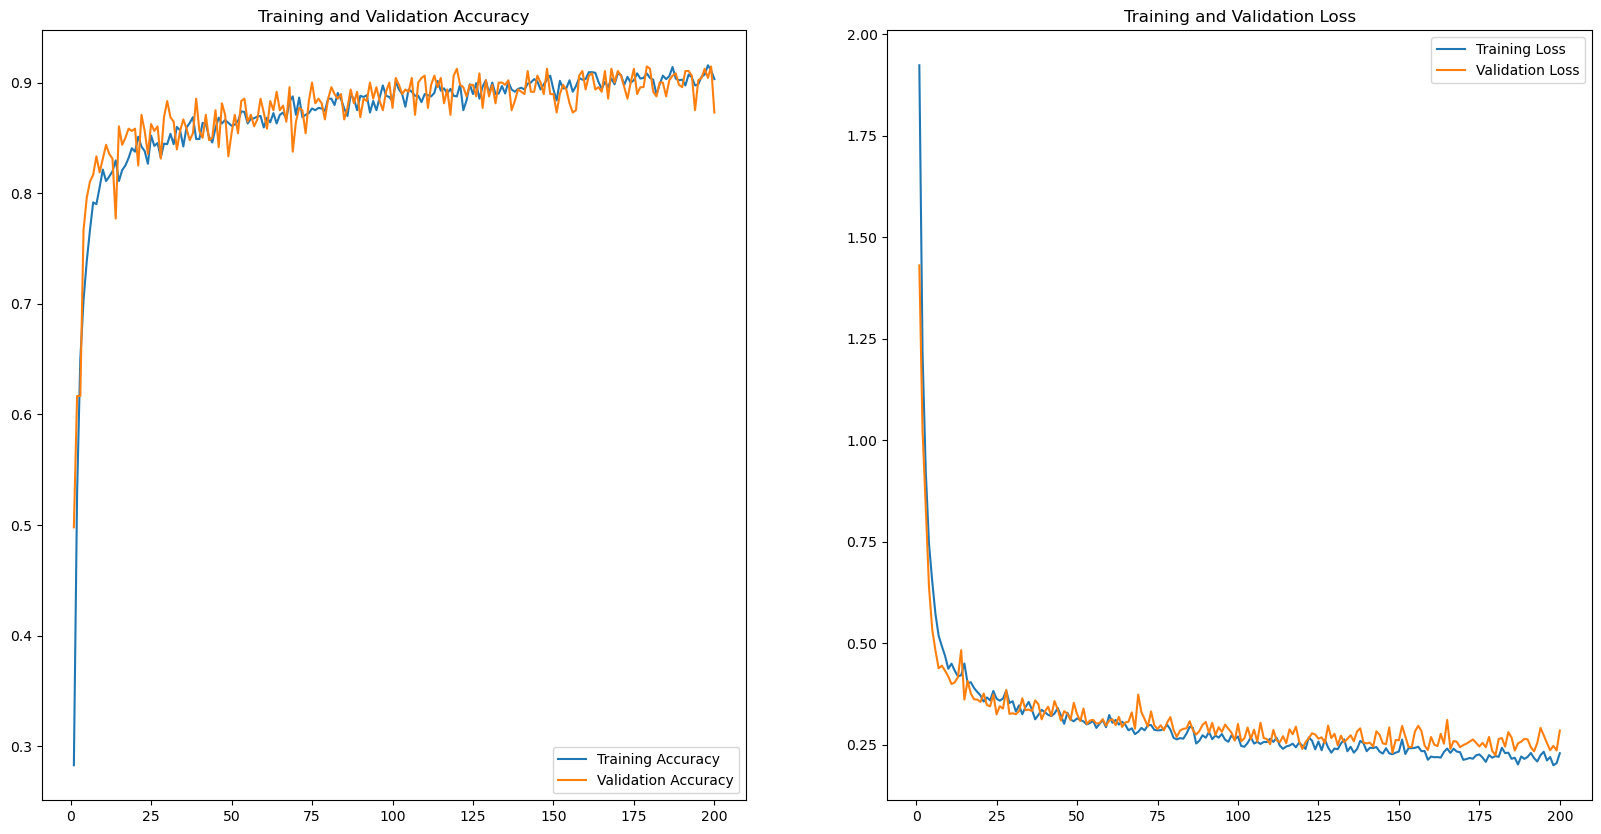

In [540]:
import seaborn as sns
import matplotlib.pyplot as plt
# visualize training results

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(1,len(loss)+1)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('training and validation curves.png')
plt.show()


In [538]:
plt.savefig('training and validation curves.jpg')

<Figure size 640x480 with 0 Axes>

In [523]:

class_names = [" PA ", " PC ", " PE ", " PP ", " PS "," POM "," PVC "," PET "," PU "," ABS "," PE-LD "," SAN "]

In [524]:
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred

classifier = estimator(model, class_names)

15/15 [==============================] - 0s 2ms/step


C:\Users\shaif\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


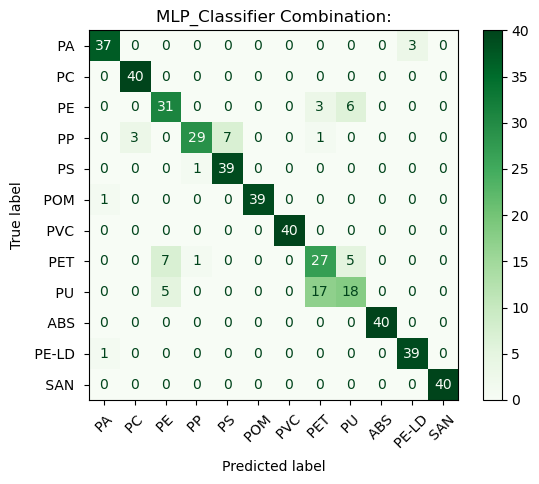

In [543]:
from sklearn.metrics import plot_confusion_matrix
degrees = 45
plot=plot_confusion_matrix(estimator=classifier, X=x_test, y_true=y_test,display_labels=class_names,include_values=True,xticks_rotation=degrees,cmap='Greens')

plt.title("MLP_Classifier Combination:")

plt.savefig('CM.png')

In [526]:
# figsize = (12,12)
# plot_confusion_matrix(estimator=classifier, X=x_test, y_true=y_test, cmap='PuBu', normalize=None,display_labels=class_names,xticks_rotation=degrees, ax=plt.subplots(figsize=figsize)[1])

In [527]:
# from keras import backend as K

# def recall_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def precision_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def f1_m(y_true, y_pred):
#     precision = precision_m(y_true, y_pred)
#     recall = recall_m(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))

# # compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# # fit the model
# history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# # evaluate the model
# loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)


In [528]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(x_test, batch_size=32, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_true=y_test, y_pred=y_pred_bool,target_names=class_names))
print('Time taken to predict the model: '+str(int(time.time()-start_time)/60)+' min')

15/15 [==============================] - 0s 867us/step
              precision    recall  f1-score   support

         PA        0.95      0.93      0.94        40
         PC        0.93      1.00      0.96        40
         PE        0.72      0.78      0.75        40
         PP        0.94      0.72      0.82        40
         PS        0.85      0.97      0.91        40
        POM        1.00      0.97      0.99        40
        PVC        1.00      1.00      1.00        40
        PET        0.56      0.68      0.61        40
         PU        0.62      0.45      0.52        40
        ABS        1.00      1.00      1.00        40
      PE-LD        0.93      0.97      0.95        40
        SAN        1.00      1.00      1.00        40

    accuracy                           0.87       480
   macro avg       0.87      0.87      0.87       480
weighted avg       0.87      0.87      0.87       480

Time taken to predict the model: 2.05 min


In [533]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy_score(y_true=y_test, y_pred=y_pred_bool)

0.8729166666666667

In [534]:
precision_score(y_true=y_test, y_pred=y_pred_bool,average='weighted')

0.8745793150903108

In [535]:
recall_score(y_true=y_test, y_pred=y_pred_bool,average='weighted')

0.8729166666666667

In [536]:
f1_score(y_true=y_test, y_pred=y_pred_bool,average='weighted')

0.870447263775699